In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

###4

In [ ]:
def difference_score(x_goal, x_m):
  diff = x_goal ^ x_m
  score = 0
  while diff:
    diff &= (diff - 1)
    score += 1
  return score

def sum_score(x_m):
  score = 0
  while x_m:
    x_m &= (x_m - 1)
    score += 1
  return score

def invert_bits(x, p, l): 
  x_m = x
  for bitPos in range(l):
    if random.random() < p:
      x_m ^= 1 << bitPos
  return x_m

Using the difference score method

x_m: 0b1101001001001010001101101001110011001001011111111010000011001100111110000111010101010110110100000110 

Final difference score using (c):  0
Final difference score using (c'): 46 

x_m: 0b1010001111111000110001011100100000110111101100000100110001011010101111001101111001101000001011101 

Final difference score using (c):  1
Final difference score using (c'): 59 

x_m: 0b111101000110100100100010100000111010110111100011110111010000110110001100001011011001001000000010110 

Final difference score using (c):  0
Final difference score using (c'): 57 

x_m: 0b1000000100100101001010000010010010101010011100100100001101011110110111110111001101011101011101100011 

Final difference score using (c):  0
Final difference score using (c'): 49 

x_m: 0b1100100100101010001100111000010100011111000111100011100001101100010101111110101000000110110001101100 

Final difference score using (c):  0
Final difference score using (c'): 45 

x_m: 0b11110000111011011101110011111010110010000100000010001010110011

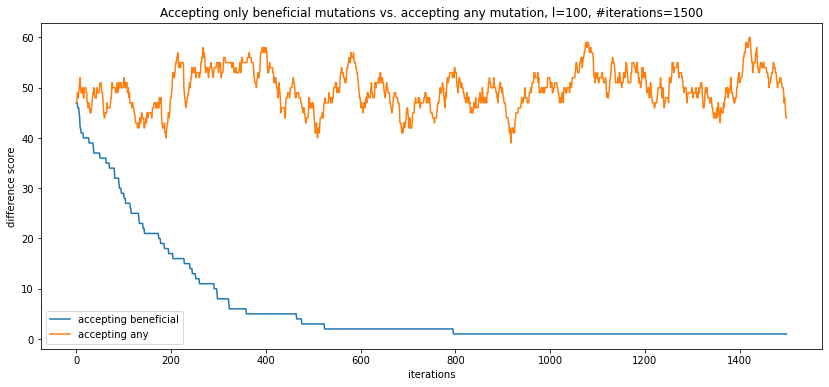

In [ ]:
# b
nr_runs = 10 # set to 1 for a and c, set to 10
for run in range(nr_runs): 
  l = 100
  p = 1/l
  iterations = 1500

  x_m = 0
  x_goal = random.randint(0, 2**l - 1)
  # x_goal = 2**l - 1
  #print(f'goal: {bin(x_goal):>102}', x_goal,'\n')

  # a
  x = random.randint(0, 2**l - 1)
  x2 = x
  #print(f'x:    {bin(x):>102}', x, '\n')

  diff_score_0 = difference_score(x_goal, x)
  #print('Initial difference score: ', diff_score_0, '\n')


  fitness = np.zeros((2, iterations))  # for storing the fitness scores
  fitness[:, 0] = np.asarray([diff_score_0, diff_score_0])  # init
  for i in range(1, iterations): 
    x_m = invert_bits(x, p, l)
    # c
    if difference_score(x_goal, x) > difference_score(x_goal, x_m):       # if new sequence better
      x = x_m           # replace with new value
    # c'
    x2 = invert_bits(x2, p, l)  # "replace x with x_m"

    # record scores
    fitness[0, i] = difference_score(x_goal, x)
    fitness[1, i] = difference_score(x_goal, x2)
  print('x_m:', bin(x_m), '\n')
  print("Final difference score using (c): ", difference_score(x_goal, x))
  print("Final difference score using (c'):", difference_score(x_goal, x2), "\n")

plt.figure(figsize=(14,6))
plt.plot(fitness[0, :], label="accepting beneficial")
plt.plot(fitness[1, :], label="accepting any")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("difference score")
title = f"Accepting only beneficial mutations vs. accepting any mutation, l={l}, #iterations={iterations}"
plt.title(title)
plt.show()


Using the sum score method

goal: 0b1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111 1267650600228229401496703205375 

x:    0b101001110111100100111100101111000001101000010000001110100000111010001100000110111111011001000001010 414644507809543356176436015626 

Initial sum score: 4
x_m: 0b1111111111111111111111111111111111110111111111111111111111111111111111111111111111111111111111111111 

Final sum score using (c):  100
Final sum score using (c'): 47 



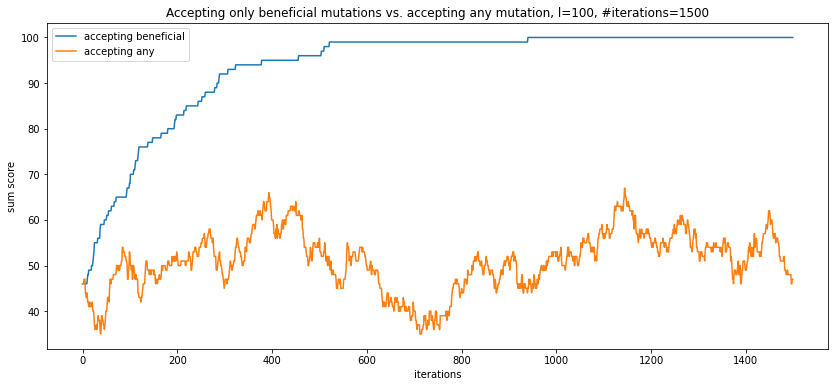

In [ ]:
l = 100
p = 1/l
iterations = 1500

x_m = 0
# x_goal = random.randint(0, 2**l - 1)
x_goal = 2**l - 1  # with the sum score method, this is automatically the goal
print(f'goal: {bin(x_goal):>12}', x_goal,'\n')

# a
x = random.randint(0, 2**l - 1)
x2 = x
print(f'x:    {bin(x):>12}', x, '\n')

sum_score_0 = sum_score(x)
print('Initial sum score:', sum_score(sum_score_0))

# b
fitness = np.zeros((2, iterations))
fitness[:, 0] = np.asarray([sum_score_0, sum_score_0])
for i in range(1, iterations): 
  x_m = invert_bits(x, p, l)
  # c
  if sum_score(x_m) > sum_score(x):  # if new sequence better
    x = x_m  # replace with new value
  # c'
  x2 = invert_bits(x2, p, l)  # "replace x with x_m"

  # record scores
  fitness[0, i] = sum_score(x)
  fitness[1, i] = sum_score(x2)
print('x_m:', bin(x_m), '\n')
print("Final sum score using (c): ", sum_score(x))
print("Final sum score using (c'):", sum_score(x2), "\n")

plt.figure(figsize=(14,6))
plt.plot(fitness[0, :], label="accepting beneficial")
plt.plot(fitness[1, :], label="accepting any")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("sum score")
title = f"Accepting only beneficial mutations vs. accepting any mutation, l={l}, #iterations={iterations}"
plt.title(title)
plt.show()

### 6 

1. Initialize the population randomly.
2. Determine the fitness of the chromosome.
3. Until done repeat:
    1. Select parents.
    2. Perform crossover and mutation.
    3. Calculate the fitness of the new population.
    4. Append it to the gene pool.

```
Initialize procedure GA{
    Set cooling parameter = 0;
    Evaluate population P(t);
    While( Not Done ){
        Parents(t) = Select_Parents(P(t));
        Offspring(t) = Procreate(P(t));
        p(t+1) = Select_Survivors(P(t), Offspring(t));
        t = t + 1; 
    }
}
```

Code for generating a random dummy example with 8 cities

In [ ]:
# Cities to be visited
cities = ["London", "Venice", "Dunedin", "Singapore", "Beijing", "Phoenix", "Tokyo", "Victoria"]
city_locations = {}

"""
# Keep city name: 
def generate_locations(cities, city_locations):
  # Give all cities a random location
  for c in cities:
    city_locations[c] = (random.randint(0, 100), random.randint(0, 100))
"""
# Use number of city, c contains the city name: 
def generate_locations(cities, city_locations):
  # Give all cities a random location
  for nr,c in enumerate(cities):
    city_locations[nr+1] = (random.randint(0, 50), random.randint(0, 50))

# Calculate distance between two cities
def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return sqrt(d[0] * d[0] + d[1] * d[1]) 

generate_locations(cities, city_locations)

# Distance matrix
distance_matrix = {}

# Generate the distance between the cities and save in distance_matrix
for city1, loc1 in city_locations.items():
    distance_matrix[city1] = {}
    for city2, loc2 in city_locations.items():
        distance_matrix[city1][city2] = dist(loc1, loc2) 

print(distance_matrix)


{1: {1: 0.0, 2: 14.317821063276353, 3: 28.178005607210743, 4: 6.708203932499369, 5: 26.419689627245813, 6: 28.30194339616981, 7: 22.67156809750927, 8: 16.1245154965971}, 2: {1: 14.317821063276353, 2: 0.0, 3: 22.02271554554524, 4: 20.0, 5: 33.60059523282288, 6: 35.805027579936315, 7: 32.202484376209235, 8: 5.385164807134504}, 3: {1: 28.178005607210743, 2: 22.02271554554524, 3: 0.0, 4: 29.068883707497267, 5: 26.076809620810597, 6: 28.0178514522438, 7: 29.120439557122072, 8: 27.16615541441225}, 4: {1: 6.708203932499369, 2: 20.0, 3: 29.068883707497267, 4: 0.0, 5: 21.18962010041709, 6: 22.847319317591726, 7: 16.64331697709324, 8: 22.561028345356956}, 5: {1: 26.419689627245813, 2: 33.60059523282288, 3: 26.076809620810597, 4: 21.18962010041709, 5: 0.0, 6: 2.23606797749979, 7: 6.324555320336759, 8: 38.28837943815329}, 6: {1: 28.30194339616981, 2: 35.805027579936315, 3: 28.0178514522438, 4: 22.847319317591726, 5: 2.23606797749979, 6: 0.0, 7: 7.0, 8: 40.45985664828782}, 7: {1: 22.67156809750927,

Functions for generating a random solution and for calculating fitness


In [ ]:
# Initialize the solution array (can be used to make the first parents)
def generate_solution_array(length = len(cities)):
  solution_array = []
  for c in range(length):
    solution_array.append(c+1)
  random.shuffle(solution_array)
  return solution_array


# Calculate the fitness (total distance traveled) of the solution array
#def fitness(solution_array, distance_matrix):
#  fitness_score = 0
#  for c in range(len(solution_array)-1):
#    print(solution_array)
#    print(solution_array[c])
#    print(solution_array[c+1])
#    fitness_score += distance_matrix[solution_array[c-1]][solution_array[c]]
#  return fitness_score

def fitness(s,d):
  tot= 0
  for i in range(len(s)-1):
    tot += d[s[i]-1][s[i+1]-1]
  return tot



[1, 4, 5, 8, 6, 2, 3, 7]
138.25439592708733


Implementation of crossover and mutation


In [ ]:

# Based on slide 63 of slideset week 1
def crossover(parent1, parent2):

  #choose 2 cutpoints
  positions = len(parent1)
  cutpoints = np.random.choice(positions, 2, replace=False)
  cutpoint1 = np.min(cutpoints)
  cutpoint2 = np.max(cutpoints)
  #cutpoint1 = 2 (fixed for testing)
  #cutpoint2 = 4
  
  #copy between cutpoints to offspring
  child1 = [0] * len(parent1)
  child2 = [0] * len(parent1)
  for ind in range(cutpoint1, cutpoint2+1):
    child1[ind] = parent2[ind]
    child2[ind] = parent1[ind]

  #fill in the rest 
  j1 = (cutpoint2+1)%positions
  j2 = (cutpoint2+1)%positions
  for i in range(cutpoint2+1, cutpoint2 + positions+1):
    k = i%positions
    if (parent1[k] not in parent2[cutpoint1:(cutpoint2+1)]):
      child1[j1] = parent1[k]
      j1 = (j1 + 1)%positions
    if (parent2[k] not in parent1[cutpoint1:(cutpoint2+1)]):
      child2[j2] = parent2[k]
      j2 = (j2 + 1)%positions
   
  return child1, child2


# I currently only use one parent for the mutation but it seems like this is also done in the slide
# Reverse sequence mutation (swap two values at random index)
def mutation(solution_array):
  index = random.sample(range(0, len(solution_array)-1), 2)
  solution_array[index[0]], solution_array[index[1]] = solution_array[index[1]], solution_array[index[0]]
  return solution_array

Below is the code for the simple evolutionary algorithm solution to the TSP. 

In [ ]:
#simple Evolutionary strategy
def simple_SEA( nr_cities, distance_array, nr_g):
#initialize population
  size_pop = 20
  population = []
  children = []
  nr_generations = nr_g
  pc= 1.0 #probability crossover
  pm = 0.001 #probability mutation
  best_fit_SEA = []
  for mu in range(size_pop):
    population.append(generate_solution_array(nr_cities))

  #simulate evolution
  for gen in range(nr_generations):
    #select random pairs
    pairs = paired_pop = np.random.choice(size_pop,(int(size_pop/2), 2), replace=False)
    #cross over
    for pair in pairs:
      prob_cross  = np.random.uniform(0.0,1.0)
      if prob_cross <= pc:
        c1,c2 = crossover(population[pair[0]],population[pair[1]])
      else:
        c1 = generate_solution_array()
        c2 = generate_solution_array()
      children.append(c1)
      children.append(c2)

    #mutations
    for nr, child in enumerate(children):
      prob_mutate = np.random.uniform(0.0,1.0)
      if prob_mutate < pm:
        children[nr] = mutation(child)

    #calculate fitness 
    population.extend(children)
    fit_list = list(map(lambda x: fitness(x,distance_array), population))
    lowest = min(fit_list)
    fit_list = list(map(lambda x: x - (lowest-1), fit_list))
  
    sum_fit = sum(list(map(lambda x: 1/x, fit_list)))

    #caculate selection probabilities 
    # note that we want to minimize the distance, so everything is 1/x
    selection_prob =list(map(lambda x: ((1/x)/sum_fit), fit_list))

    #select new generaton

    kept = np.random.choice(len(population),size = size_pop, replace=False,p =selection_prob ) 

    popp =[population[h] for h in kept]
    
    
    children.clear()
    best_fit_SEA.append(lowest)
    population = list(popp)
  return best_fit_SEA

Below is the adjusted version of the EA using local search
in the form of 2-opt
code inspired by a tutuorial(http://pedrohfsd.com/2017/08/09/2opt-part1.html) and by wikipedia (https://en.wikipedia.org/wiki/2-opt)


In [ ]:
def two_opt(path, distance_array):
     best_path = path
     best_fitness = fitness(best_path, distance_array)
     improved = True
     while improved:
          improved = False
          for i in range(1, len(path)-2):
               for j in range(i+1, len(path)):
                    if j-i == 1:
                       continue # changes nothing, skip then
                    else:
                      canididate_path = two_opt_swap(best_path,j,i) 
                      candidate_fitness = fitness(canididate_path, distance_array)
                      if (candidate_fitness < best_fitness):
                        #print(candidate_fitness < best_fitness)
                        best_path = canididate_path
                        best_fitness = candidate_fitness
                        improved = True
     return best_path


In [ ]:
def two_opt_swap(path, j, i):
  copy = path[:]
  a =  copy[j-1:i-1:-1]
  copy[i:j] = a
  return copy

In [ ]:
def local_search(population, d):
  for ind, path in enumerate(population):
    population[ind] = two_opt(path,d)

In [ ]:
#memetic algorithm 

def ME(nr_cities, distance_array, nr_g):
  #initialize population
  size_pop = 20
  population = []
  children = []
  nr_generations = nr_g
  pc= 1.0 #probability crossover
  pm = 0.001 #probability mutation
  best_fit_MA = []

  for mu in range(size_pop):
    population.append(generate_solution_array(nr_cities))
  local_search(population,distance_array)

  #simulate evolution
  for gen in range(nr_generations):
    #select random pairs
    pairs = paired_pop = np.random.choice(size_pop,(int(size_pop/2), 2), replace=False)
    #cross over
    for pair in pairs:
      prob_cross  = np.random.uniform(0.0,1.0)
      if prob_cross <= pc:
        c1,c2 = crossover(population[pair[0]],population[pair[1]])
      else:
        c1 = generate_solution_array()
        c2 = generate_solution_array()
      children.append(c1)
      children.append(c2)

    #mutations
    for nr, child in enumerate(children):
      prob_mutate = np.random.uniform(0.0,1.0)
      if prob_mutate < pm:
        children[nr] = mutation(child)

    local_search(children,distance_array)
    #calculate fitness 
    population.extend(children)
    fit = fitness(population[0], distance_array)
    fit_list = list(map(lambda x: fitness(x,distance_array), population))
    lowest = min(fit_list)
    fit_list = list(map(lambda x: x - (lowest-1), fit_list))
  
    sum_fit = sum(list(map(lambda x: 1/x, fit_list)))

    #caculate selection probabilities 
    # note that we want to minimize the distance, so everything is 1/x
    selection_prob =list(map(lambda x: ((1/x)/sum_fit), fit_list))

    #select new generaton

    kept = np.random.choice(len(population),size = size_pop, replace=False,p =selection_prob ) 

    popp =[population[h] for h in kept]
    
    
    children.clear()
    best_fit_MA.append(lowest)
    population = list(popp)
  return best_fit_MA


In [ ]:
#import data
import pandas as pd
list_file = []
with open('/content/file-tsp.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split()
        row  = [float (row[0]),float(row[1])]
        list_file.append(row)

print(list_file[0])
distance_matrix_file =  [[dist(list_file[j],list_file[i]) for i in range(len(list_file))] for j in range(len(list_file))]




[0.2554, 18.2366]


In [ ]:
list_bays29 = []
with open('/content/bays29-tsp.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split()
        row  = [float (row[0]),float(row[1])]
        list_bays29.append(row)

distance_matrix_bays29 = [[dist(list_bays29[j],list_file[i]) for i in range(len(list_bays29))] for j in range(len(list_bays29))]



In [ ]:
#calculate the best fit over the generations for the file provided in the assignment
best_file_ME = ME(len(list_file),distance_matrix_file, 1500)
best_file_SEA = simple_SEA(len(list_file),distance_matrix_file, 1500)

#calculate the best fit over the generations for the cities in Bavaria dataset bays29
#from the file, only the distances were included.
best_bays29_ME = ME(len(list_bays29),distance_matrix_bays29,1500)
best_bays29_SEA = simple_SEA(len(list_bays29),distance_matrix_bays29, 1500)

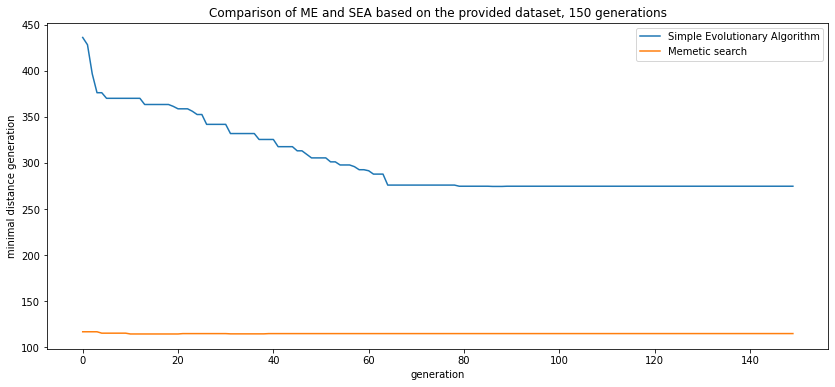

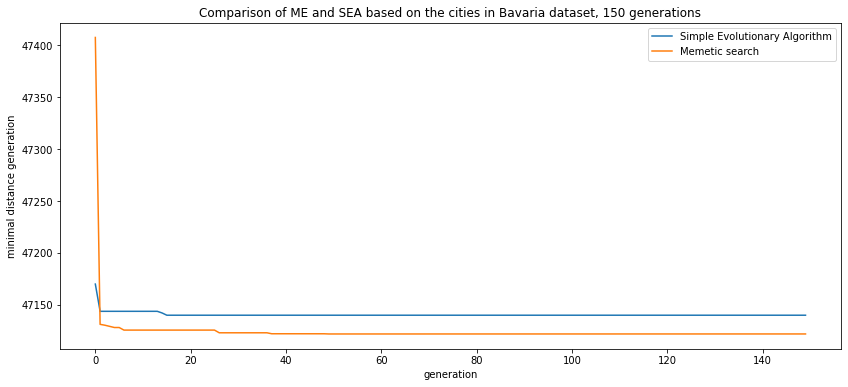

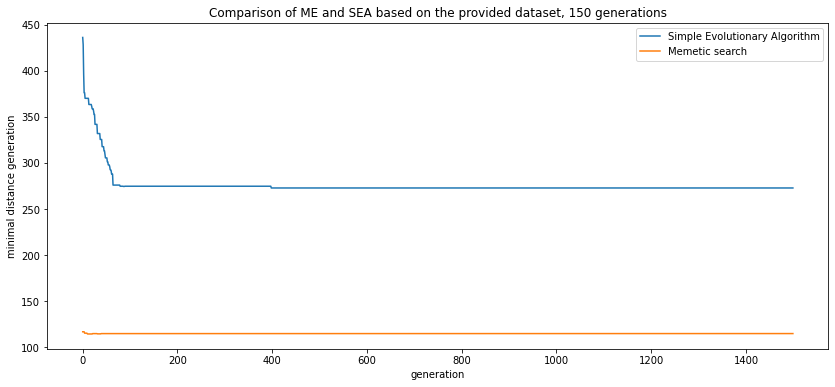

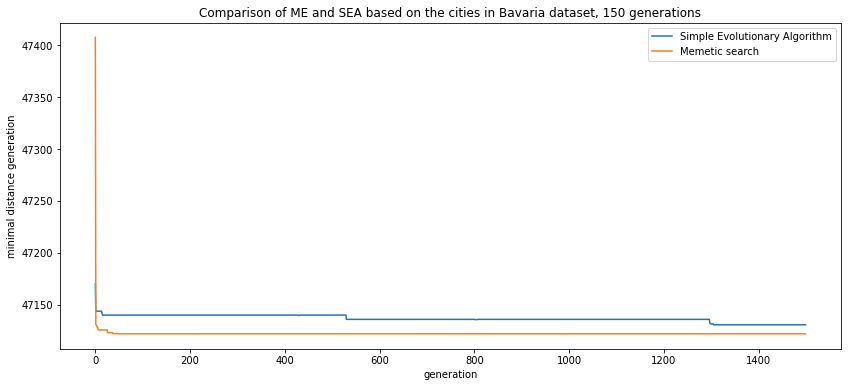

In [ ]:

plt.figure(figsize=(14,6))
plt.plot(best_file_SEA[:150], label="Simple Evolutionary Algorithm")
plt.plot(best_file_ME[:150], label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the provided dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_bays29_SEA[:150], label="Simple Evolutionary Algorithm")
plt.plot(best_bays29_ME[:150], label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the cities in Bavaria dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_file_SEA, label="Simple Evolutionary Algorithm")
plt.plot(best_file_ME, label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the provided dataset, 150 generations")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(best_bays29_SEA, label="Simple Evolutionary Algorithm")
plt.plot(best_bays29_ME, label="Memetic search")
plt.legend()
plt.xlabel("generation")
plt.ylabel("minimal distance generation")
plt.title("Comparison of ME and SEA based on the cities in Bavaria dataset, 150 generations")
plt.show()

### 8

In [8]:
!pip install git+https://github.com/PMBio/pygp.git
from pygp import pygp
from pygp import tools
from pygp import primitives


# pset = primitives.pset
# v = ["x", "y"]
# for item in v:
#     pset[item] = 0
# s = tools.primitive_handler(pset, v)

  Cloning https://github.com/PMBio/pygp.git to /tmp/pip-req-build-k0hnmbvd
  Running command git clone -q https://github.com/PMBio/pygp.git /tmp/pip-req-build-k0hnmbvd
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


ModuleNotFoundError: ignored